In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split,cross_val_predict
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,precision_recall_curve,roc_auc_score

In [2]:
data = pd.read_csv(r"../dataset/dataset_phishing.csv")
data

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [4]:
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [5]:
for cols in data.columns:
    if len(data[cols].unique()) < 2:
        print(f"{cols} : {data[cols].unique()}")

nb_or : [0]
ratio_nullHyperlinks : [0]
ratio_intRedirection : [0]
ratio_intErrors : [0]
submit_email : [0]
sfh : [0]


In [6]:

for cols in data.columns:
    if len(data[cols].unique()) == 2:
        print(f"{cols} : {data[cols].unique()}")

ip : [0 1]
nb_tilde : [0 1]
nb_star : [0 1]
nb_dslash : [0 1]
https_token : [1 0]
punycode : [0 1]
port : [0 1]
tld_in_path : [0 1]
tld_in_subdomain : [0 1]
abnormal_subdomain : [0 1]
prefix_suffix : [0 1]
random_domain : [0 1]
shortening_service : [0 1]
path_extension : [0 1]
nb_external_redirection : [0 1]
domain_in_brand : [0 1]
brand_in_subdomain : [0 1]
brand_in_path : [0 1]
suspecious_tld : [0 1]
login_form : [0 1]
external_favicon : [0 1]
iframe : [0 1]
popup_window : [0 1]
onmouseover : [0 1]
right_clic : [0 1]
empty_title : [0 1]
domain_in_title : [0 1]
domain_with_copyright : [1 0]
whois_registered_domain : [0 1]
dns_record : [1 0]
google_index : [1 0]
status : ['legitimate' 'phishing']


In [7]:
for cols in data.columns:
    if len(data[cols].unique()) > 2:
        print(f"{cols}")

url
length_url
length_hostname
nb_dots
nb_hyphens
nb_at
nb_qm
nb_and
nb_eq
nb_underscore
nb_percent
nb_slash
nb_colon
nb_comma
nb_semicolumn
nb_dollar
nb_space
nb_www
nb_com
http_in_path
ratio_digits_url
ratio_digits_host
nb_subdomains
nb_redirection
length_words_raw
char_repeat
shortest_words_raw
shortest_word_host
shortest_word_path
longest_words_raw
longest_word_host
longest_word_path
avg_words_raw
avg_word_host
avg_word_path
phish_hints
statistical_report
nb_hyperlinks
ratio_intHyperlinks
ratio_extHyperlinks
nb_extCSS
ratio_extRedirection
ratio_extErrors
links_in_tags
ratio_intMedia
ratio_extMedia
safe_anchor
domain_registration_length
domain_age
web_traffic
page_rank


In [8]:
# 26,27,28,35,54,37-50,51-56,58-73,75-83,85,87

data = data.drop(data.iloc[:,[0,9,26,27,28,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,75,76,
                  77,78,79,80,81,82,83,85,87]],axis = 1)

In [9]:
data["http_in_path"].unique()

array([0, 1, 4, 3, 2], dtype=int64)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   length_url          11430 non-null  int64 
 1   length_hostname     11430 non-null  int64 
 2   ip                  11430 non-null  int64 
 3   nb_dots             11430 non-null  int64 
 4   nb_hyphens          11430 non-null  int64 
 5   nb_at               11430 non-null  int64 
 6   nb_qm               11430 non-null  int64 
 7   nb_and              11430 non-null  int64 
 8   nb_eq               11430 non-null  int64 
 9   nb_underscore       11430 non-null  int64 
 10  nb_tilde            11430 non-null  int64 
 11  nb_percent          11430 non-null  int64 
 12  nb_slash            11430 non-null  int64 
 13  nb_star             11430 non-null  int64 
 14  nb_colon            11430 non-null  int64 
 15  nb_comma            11430 non-null  int64 
 16  nb_semicolumn       11

In [11]:
for col in data.columns:
    if len(data[col].unique()) < 2:
        print(f"lesser than 2 {col}")
    else:
        print(f"greater than 2 {col}")

greater than 2 length_url
greater than 2 length_hostname
greater than 2 ip
greater than 2 nb_dots
greater than 2 nb_hyphens
greater than 2 nb_at
greater than 2 nb_qm
greater than 2 nb_and
greater than 2 nb_eq
greater than 2 nb_underscore
greater than 2 nb_tilde
greater than 2 nb_percent
greater than 2 nb_slash
greater than 2 nb_star
greater than 2 nb_colon
greater than 2 nb_comma
greater than 2 nb_semicolumn
greater than 2 nb_dollar
greater than 2 nb_space
greater than 2 nb_www
greater than 2 nb_com
greater than 2 nb_dslash
greater than 2 http_in_path
greater than 2 https_token
greater than 2 port
greater than 2 tld_in_path
greater than 2 tld_in_subdomain
greater than 2 abnormal_subdomain
greater than 2 nb_subdomains
greater than 2 nb_hyperlinks
greater than 2 popup_window
greater than 2 web_traffic
greater than 2 google_index
greater than 2 status


In [12]:
ordinal_enc = OrdinalEncoder()
data["status"] = ordinal_enc.fit_transform(data["status"].values.reshape(-1,1))
data["status"]

0        0.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
11425    0.0
11426    1.0
11427    0.0
11428    0.0
11429    1.0
Name: status, Length: 11430, dtype: float64

In [13]:
#data[data["https_token"] == 0]

# Visualising

In [14]:
#30,31
def counting(var,col):
    return sns.countplot(x = var,data = data, hue = col)
    

<AxesSubplot:xlabel='status', ylabel='count'>

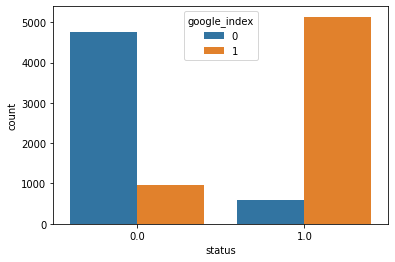

In [15]:
counting("status","google_index")

<AxesSubplot:xlabel='status', ylabel='count'>

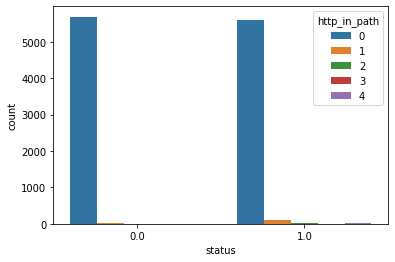

In [16]:
counting("status","http_in_path")

<AxesSubplot:xlabel='status', ylabel='count'>

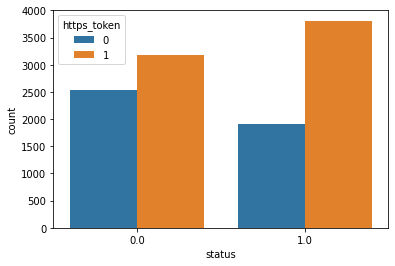

In [17]:
counting("status","https_token")

<AxesSubplot:xlabel='status', ylabel='count'>

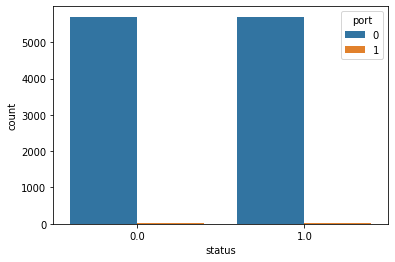

In [18]:
counting("status","port")

<AxesSubplot:xlabel='status', ylabel='count'>

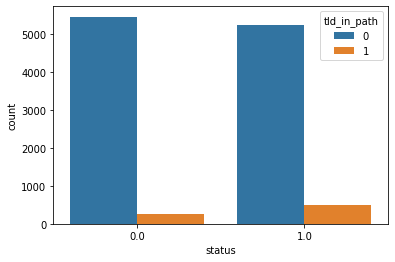

In [19]:
counting("status","tld_in_path")

<AxesSubplot:xlabel='status', ylabel='count'>

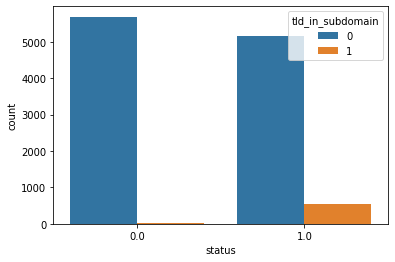

In [20]:
counting("status","tld_in_subdomain")

<AxesSubplot:xlabel='status', ylabel='count'>

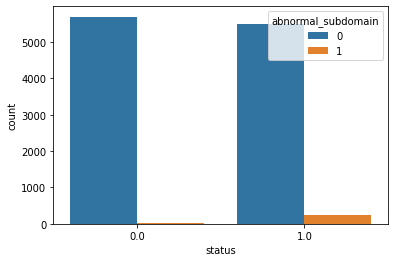

In [21]:
counting("status","abnormal_subdomain")

<AxesSubplot:xlabel='status', ylabel='count'>

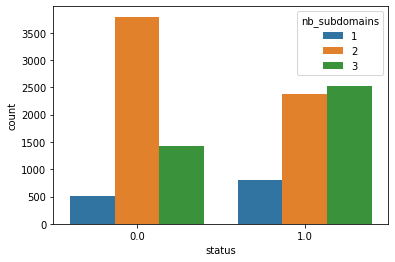

In [22]:
counting("status","nb_subdomains")       

<AxesSubplot:xlabel='status', ylabel='count'>

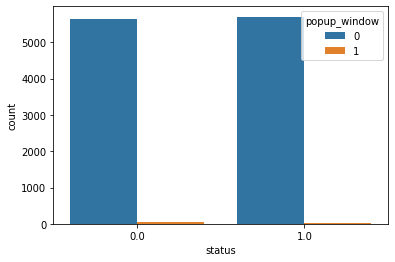

In [23]:
counting("status","popup_window")

In [24]:
data = data.drop(data.iloc[:,[25,26]],axis = 1)

array([[<AxesSubplot:xlabel='http_in_path', ylabel='http_in_path'>,
        <AxesSubplot:xlabel='nb_subdomains', ylabel='http_in_path'>,
        <AxesSubplot:xlabel='web_traffic', ylabel='http_in_path'>,
        <AxesSubplot:xlabel='google_index', ylabel='http_in_path'>,
        <AxesSubplot:xlabel='status', ylabel='http_in_path'>],
       [<AxesSubplot:xlabel='http_in_path', ylabel='nb_subdomains'>,
        <AxesSubplot:xlabel='nb_subdomains', ylabel='nb_subdomains'>,
        <AxesSubplot:xlabel='web_traffic', ylabel='nb_subdomains'>,
        <AxesSubplot:xlabel='google_index', ylabel='nb_subdomains'>,
        <AxesSubplot:xlabel='status', ylabel='nb_subdomains'>],
       [<AxesSubplot:xlabel='http_in_path', ylabel='web_traffic'>,
        <AxesSubplot:xlabel='nb_subdomains', ylabel='web_traffic'>,
        <AxesSubplot:xlabel='web_traffic', ylabel='web_traffic'>,
        <AxesSubplot:xlabel='google_index', ylabel='web_traffic'>,
        <AxesSubplot:xlabel='status', ylabel='web_traffic

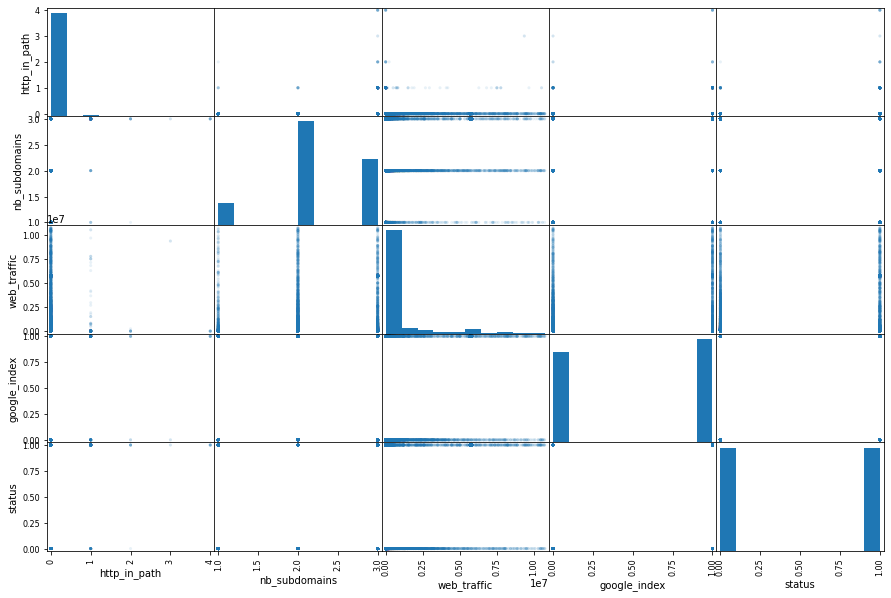

In [25]:
attrs = ["http_in_path","nb_subdomains","web_traffic","google_index","status"]
scatter_matrix(data[attrs],figsize = (15,10),alpha = 0.1)

<AxesSubplot:>

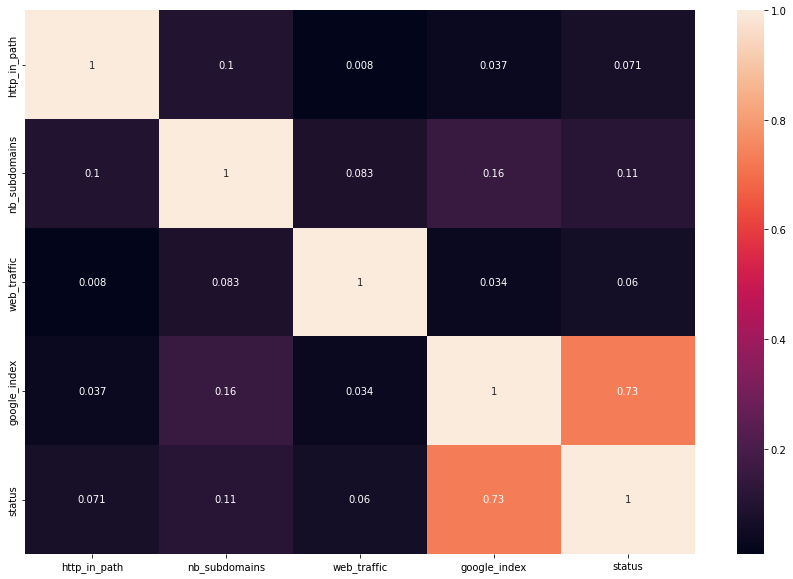

In [26]:
figure,axes = plt.subplots(figsize = (15,10))
sns.heatmap(data[attrs].corr(),annot = True,ax = axes)

In [27]:
data["nb_www"].unique()

array([1, 0, 2], dtype=int64)

In [28]:
cor_mat = data.corr()
cor_mat["status"]

length_url            0.248580
length_hostname       0.238322
ip                    0.321698
nb_dots               0.207029
nb_hyphens           -0.100107
nb_at                 0.142915
nb_qm                 0.294319
nb_and                0.170546
nb_eq                 0.233386
nb_underscore         0.038091
nb_tilde              0.030142
nb_percent            0.028101
nb_slash              0.242270
nb_star               0.026465
nb_colon              0.092835
nb_comma              0.011865
nb_semicolumn         0.103554
nb_dollar             0.024962
nb_space             -0.004193
nb_www               -0.443468
nb_com                0.156284
nb_dslash             0.072602
http_in_path          0.070776
https_token           0.114669
port                  0.009011
abnormal_subdomain    0.128160
nb_subdomains         0.112891
nb_hyperlinks        -0.342628
popup_window         -0.057602
web_traffic           0.060388
google_index          0.731171
status                1.000000
Name: st

<AxesSubplot:>

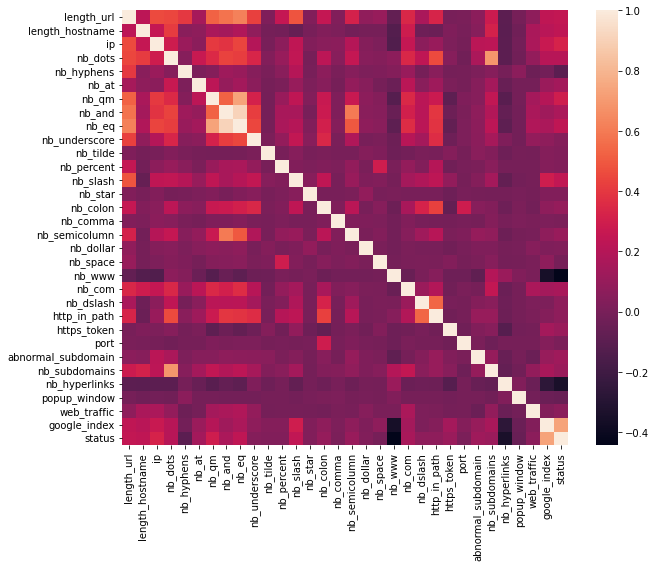

In [29]:
plt.figure(figsize = (10,8))
sns.heatmap(cor_mat)


<AxesSubplot:xlabel='status', ylabel='count'>

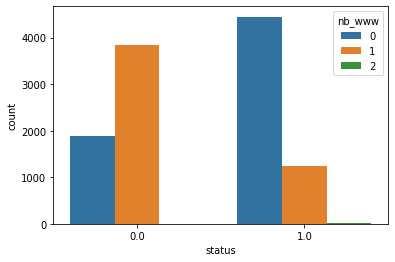

In [30]:
counting("status","nb_www")

<AxesSubplot:xlabel='nb_www', ylabel='count'>

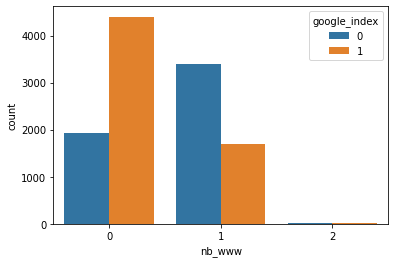

In [31]:
counting("nb_www","google_index")

#  Splitting train and test set 

In [32]:
data["google_index_cut"] = pd.cut(data["google_index"],
                             bins = [-1,0,1]).astype(str)

<AxesSubplot:>

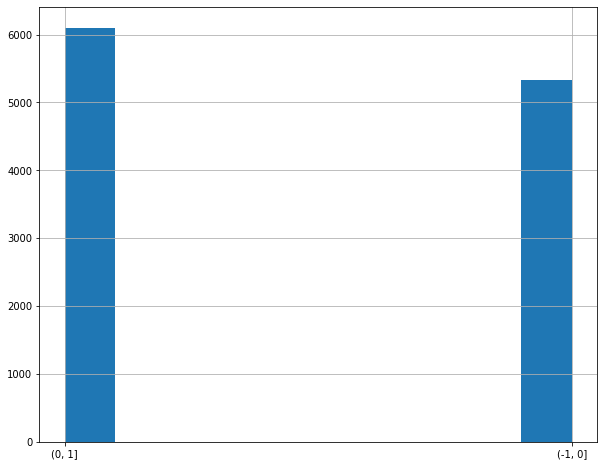

In [33]:
plt.figure(figsize = (10,8))
data["google_index_cut"].hist()

In [34]:
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 42)
for train_index,test_index in split.split(data,data["google_index_cut"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]


In [35]:
strat_train_set["google_index_cut"].value_counts() / len(strat_train_set)

(0, 1]     0.533902
(-1, 0]    0.466098
Name: google_index_cut, dtype: float64

In [36]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("google_index_cut", axis=1, inplace=True)

In [37]:
train_set,test_set = train_test_split(data,test_size = 0.2,random_state = 100)

In [38]:
train_set["google_index"].value_counts() / len(train_set)

1    0.532918
0    0.467082
Name: google_index, dtype: float64

# Preprocessing data

In [44]:
web_in = strat_train_set.drop("status",axis = 1)
web_out = strat_train_set["status"]

In [60]:
web_in

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,nb_dslash,http_in_path,https_token,port,abnormal_subdomain,nb_subdomains,nb_hyperlinks,popup_window,web_traffic,google_index
619,41,33,0,3,2,0,0,0,0,0,...,0,0,1,0,0,3,103,0,481145,1
2844,66,26,0,2,1,0,1,0,1,0,...,0,0,0,0,0,2,197,0,0,0
10795,45,27,0,3,0,0,0,0,0,0,...,0,0,1,0,0,3,1,0,0,1
2353,73,13,0,2,5,0,0,0,0,0,...,0,0,1,0,0,2,17,0,142110,0
2401,26,18,0,2,0,0,0,0,0,0,...,0,0,1,0,0,2,82,0,485347,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10114,86,16,0,2,1,0,0,0,0,1,...,0,0,1,0,0,2,13,0,4431878,1
9173,34,8,0,1,1,0,0,0,0,0,...,0,0,1,0,0,1,37,0,0,1
9412,33,25,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2971,59,16,0,2,0,0,0,0,0,3,...,0,0,0,0,0,2,996,0,12,1


In [51]:
class scaled_data(BaseEstimator,TransformerMixin):
    def __init__(self,columns = None):
        self.columns = columns
    
    def fit(self,X,y):
        return self
    
    def transform(self,X,y):
        pass
    
    def fit_transform(self):
        pass

In [57]:
scale_pipe = Pipeline([
    ("scaling",MinMaxScaler()),
    ("fill null",SimpleImputer(strategy = "median"))
])

In [58]:
scaled_web_in = scale_pipe.fit_transform(web_in)

In [59]:
scaled_web_in

array([[1.78023327e-02, 1.38095238e-01, 0.00000000e+00, ...,
        0.00000000e+00, 4.47576786e-02, 1.00000000e+00],
       [3.31491713e-02, 1.04761905e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.02578269e-02, 1.09523810e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.28913444e-02, 1.00000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.88520565e-02, 5.71428571e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.11627917e-06, 1.00000000e+00],
       [7.36648250e-03, 4.76190476e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.25024198e-02, 1.00000000e+00]])

# Model Selection

In [111]:
def model_train(model):
    model.fit(scaled_web_in,web_out)
    y_pred = model.predict(scaled_web_in)
    return y_pred

In [109]:
def model_metrics(y_pred,y):
    return confusion_matrix(y_pred,y),precision_score(y_pred,y),recall_score(y_pred,y),f1_score(y_pred,y)

In [401]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], color = "blue", label="Precision")
    plt.plot(thresholds, recalls[:-1], color = "green", label="Recall")
    plt.xlabel("Threshold")
    
    plt.legend()

In [388]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls[:-1],precisions[:-1], color = "red")
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.ylabel("Precision")
    plt.xlabel("Recall")
    

In [516]:
def plot_roc(fpr,tpr,label = None):
    plt.plot(fpr,tpr,label = label)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

### Logistic Regression

In [390]:
rand_val = scaled_web_in[0]
rand_label = web_out[0]
rand_val , rand_label

(array([0.01780233, 0.13809524, 0.        , 0.08695652, 0.04651163,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03225806, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5       ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.02210775, 0.        , 0.04475768,
        1.        ]),
 0.0)

In [402]:
log_model = LogisticRegression()
pred_log = model_train(log_model)

In [403]:
log_model.coef_ , log_model.intercept_

(array([[  1.77556668,   5.64665087,   1.26279708,   2.80396787,
          -7.29506374,   2.74312726,   4.29044777,   1.20124789,
           2.25752379,  -4.7910178 ,  -0.36607114,  -0.31424535,
           2.62367447,   0.39008915,   1.33491884,  -0.75195257,
           1.28974175,   0.06121053,  -3.01191748,  -3.17735309,
          -0.71584399,   1.45600289,   0.37480529,   0.22722634,
          -1.50827361,   1.43439902,  -0.36929788, -10.40580936,
          -1.15222223,   0.59582984,   3.32974999]]),
 array([-1.90014487]))

In [404]:
log_model.predict([rand_val])

array([1.])

In [405]:
model_metrics(web_out,pred_log)

(array([[4010,  563],
        [ 371, 4200]], dtype=int64),
 0.8817971866470712,
 0.9188361408882083,
 0.8999357188772231)

In [406]:
log_scores = cross_val_predict(estimator = log_model,
                            X = scaled_web_in,
                            y = web_out,
                            cv = 10
                            )
log_scores

array([1., 0., 1., ..., 1., 0., 1.])

In [407]:
model_metrics(web_out,log_scores)

(array([[3998,  575],
        [ 372, 4199]], dtype=int64),
 0.8795559279430247,
 0.918617370378473,
 0.8986623863028357)

In [459]:
log_scores_ = cross_val_predict(estimator = log_model,
                            X = scaled_web_in,
                            y = web_out,
                            cv = 10,
                            method = "decision_function"
                            )
log_scores_

array([ 0.28834324, -1.86132639,  2.23671917, ...,  2.30875636,
       -1.10391006,  1.63615028])

In [460]:
precisions_log, recalls_log, thresholds = precision_recall_curve(web_out,log_scores_)

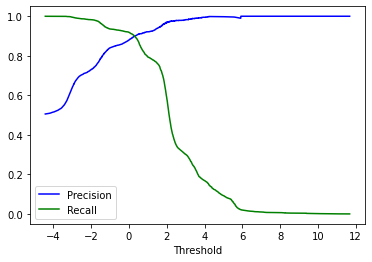

In [461]:
plot_precision_recall_vs_threshold(precisions_log, recalls_log, thresholds)
plt.show()


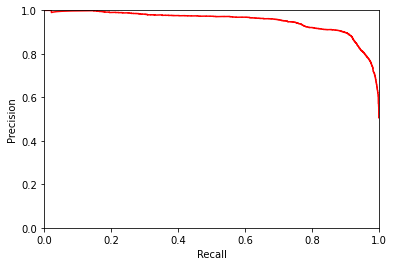

In [463]:
plot_precision_vs_recall(precisions_log,recalls_log)

In [465]:
fpr_log, tpr_log, threshold = roc_curve(web_out,log_scores_)
fpr_log, tpr_log, threshold

(array([0.        , 0.        , 0.        , ..., 0.97725782, 0.97725782,
        1.        ]),
 array([0.00000000e+00, 2.18770510e-04, 3.28155765e-03, ...,
        9.99781229e-01, 1.00000000e+00, 1.00000000e+00]),
 array([ 12.681334  ,  11.681334  ,   9.38161135, ...,  -4.42479593,
         -4.43012244, -11.44663171]))

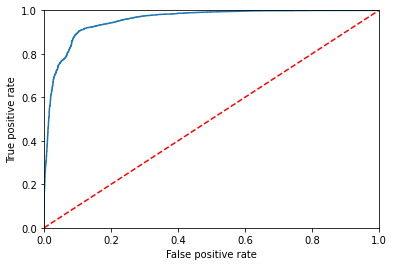

In [466]:
plot_roc(fpr_log,tpr_log)

0.9550709334554455

### Naive Bayes

In [468]:
naive_mod = GaussianNB()
pred_naive = model_train(naive_mod)

In [469]:
model_metrics(web_out,pred_naive)

(array([[4467,  106],
        [3353, 1218]], dtype=int64),
 0.9199395770392749,
 0.2664624808575804,
 0.41323155216284985)

In [470]:
naive_mod.predict([rand_val])

array([0.])

In [471]:
naive_scores = cross_val_predict(estimator = naive_mod,
                            X = scaled_web_in,
                            y = web_out,
                            cv = 10
                            )
naive_scores

array([0., 0., 0., ..., 0., 0., 0.])

In [472]:
model_metrics(web_out,naive_scores)

(array([[4468,  105],
        [3361, 1210]], dtype=int64),
 0.9201520912547528,
 0.2647123167796981,
 0.41114509004417266)

In [473]:
naive_scores_proba = cross_val_predict(estimator = naive_mod,
                            X = scaled_web_in,
                            y = web_out,
                            cv = 10,
                            method = "predict_proba"
                            )
naive_scores_proba

array([[1.00000000e+00, 1.53848865e-16],
       [1.00000000e+00, 1.94231767e-15],
       [1.00000000e+00, 5.38370124e-16],
       ...,
       [1.00000000e+00, 6.15216286e-18],
       [1.00000000e+00, 1.35410672e-74],
       [1.00000000e+00, 2.20939410e-17]])

In [475]:
precision_naive, recall_naive, threshold = precision_recall_curve(web_out,naive_scores_proba[:,1])

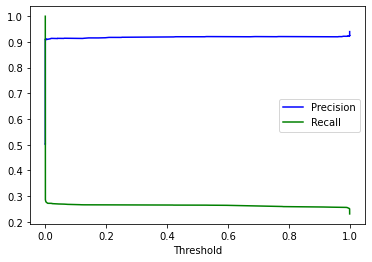

In [476]:
plot_precision_recall_vs_threshold(precision_naive,recall_naive,threshold)

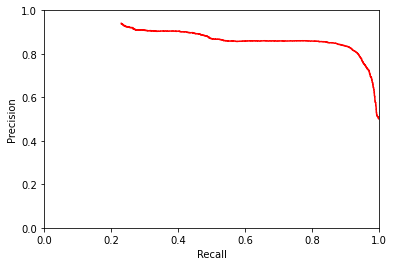

In [477]:
plot_precision_vs_recall(precision_naive, recall_naive)

In [478]:
fpr_naive, tpr_naive, thresholds = roc_curve(web_out,naive_scores_proba[:,1])

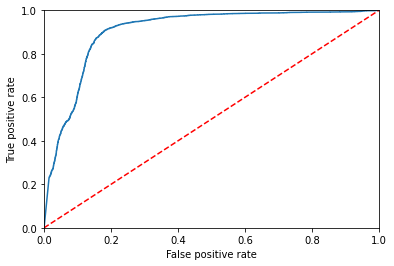

In [479]:
plot_roc(fpr_naive,tpr_naive)

0.9044700034439731

### Decision Tree

In [481]:
tree_mod = DecisionTreeClassifier(criterion = "entropy")
pred_tree = model_train(tree_mod)

In [482]:
model_metrics(web_out,pred_tree)

(array([[4572,    1],
        [   0, 4571]], dtype=int64),
 0.9997812773403325,
 1.0,
 0.9998906267089577)

In [483]:
tree_mod.predict([rand_val])

array([1.])

In [484]:
tree_scores = cross_val_predict(estimator = tree_mod,
                            X = scaled_web_in,
                            y = web_out,
                            cv = 10
                            )
tree_scores

array([1., 0., 1., ..., 1., 0., 1.])

In [485]:
model_metrics(web_out,tree_scores)

(array([[4223,  350],
        [ 356, 4215]], dtype=int64),
 0.9233296823658269,
 0.9221176985342376,
 0.922723292469352)

In [486]:
tree_scores_proba = cross_val_predict(estimator = tree_mod,
                            X = scaled_web_in,
                            y = web_out,
                            cv = 10,
                            method = "predict_proba"
                            )
tree_scores_proba


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [487]:
precision_tree,recall_tree,threshold = precision_recall_curve(web_out,tree_scores_proba[:,1])

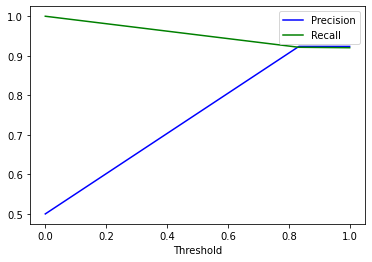

In [488]:
plot_precision_recall_vs_threshold(precision_tree,recall_tree,threshold)

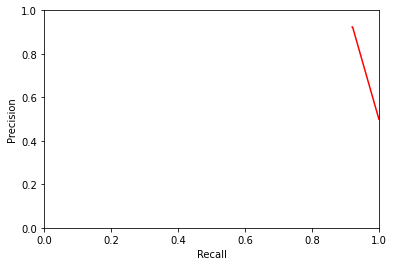

In [489]:
plot_precision_vs_recall(precision_tree,recall_tree)

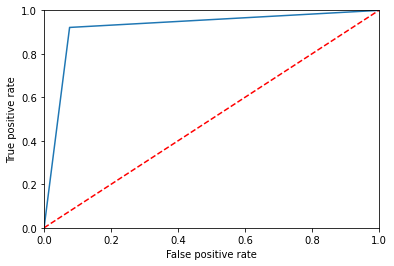

In [490]:
fpr_tree, tpr_tree, threshold = roc_curve(web_out,tree_scores_proba[:,1])
plot_roc(fpr_tree,tpr_tree)

0.9226396525352144

### Random Forest

In [492]:
rand_model = RandomForestClassifier(n_estimators = 150,
                                   criterion = "entropy")
pred_rand = model_train(rand_model)

In [493]:
model_metrics(web_out,pred_rand)

(array([[4572,    1],
        [   0, 4571]], dtype=int64),
 0.9997812773403325,
 1.0,
 0.9998906267089577)

In [494]:
rand_scores = cross_val_predict(estimator = rand_model,
                            X = scaled_web_in,
                            y = web_out,
                            cv = 10
                            )
rand_scores

array([1., 0., 1., ..., 1., 0., 1.])

In [495]:
model_metrics(web_out,rand_scores)

(array([[4351,  222],
        [ 240, 4331]], dtype=int64),
 0.9512409400395344,
 0.9474950776635309,
 0.9493643138974135)

In [496]:
rand_scores_proba = cross_val_predict(estimator = rand_model,
                            X = scaled_web_in,
                            y = web_out,
                            cv = 10,
                            method = "predict_proba"
                            )
rand_scores_proba

array([[0.16666667, 0.83333333],
       [0.79284081, 0.20715919],
       [0.01333333, 0.98666667],
       ...,
       [0.02      , 0.98      ],
       [0.99333333, 0.00666667],
       [0.03333333, 0.96666667]])

In [497]:
precision_rand, recall_rand, threshold = precision_recall_curve(web_out,rand_scores_proba[:,1])

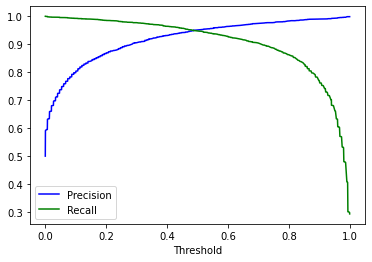

In [498]:
plot_precision_recall_vs_threshold(precision_rand,recall_rand,threshold)

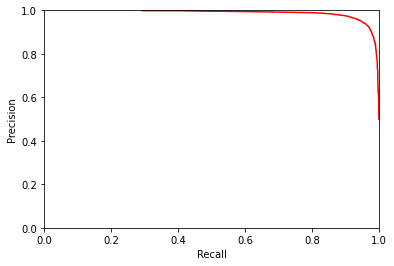

In [499]:
plot_precision_vs_recall(precision_rand,recall_rand)

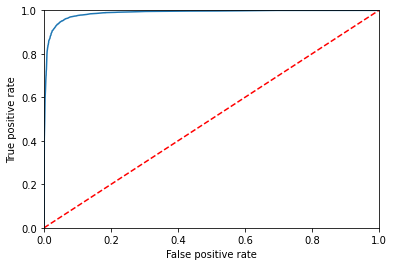

In [500]:
fpr_rand, tpr_rand, thresholds = roc_curve(web_out,rand_scores_proba[:,1])
plot_roc(fpr_rand,tpr_rand)

0.9875147961915658

### SVM

In [502]:
svm_model = SVC(kernel = "linear")
pred_svm = model_train(svm_model)

In [503]:
model_metrics(web_out,pred_svm)

(array([[3892,  681],
        [ 367, 4204]], dtype=int64),
 0.8605936540429887,
 0.9197112229271495,
 0.8891708967851101)

In [504]:
svm_scores = cross_val_predict(estimator = svm_model,
                            X = scaled_web_in,
                            y = web_out,
                            cv = 10
                            )
svm_scores

array([1., 0., 1., ..., 1., 0., 1.])

In [505]:
model_metrics(web_out,svm_scores)

(array([[3875,  698],
        [ 369, 4202]], dtype=int64),
 0.8575510204081632,
 0.9192736819076789,
 0.8873403019744484)

In [506]:
svm_scores_ = cross_val_predict(estimator = svm_model,
                            X = scaled_web_in,
                            y = web_out,
                            cv = 10,
                            method = "decision_function"
                            )
svm_scores_

array([ 0.58999007, -0.93783342,  1.23936016, ...,  1.26608071,
       -1.29883911,  0.90175814])

In [507]:
precisions_svm, recalls_svm, thresholds = precision_recall_curve(web_out,svm_scores_)

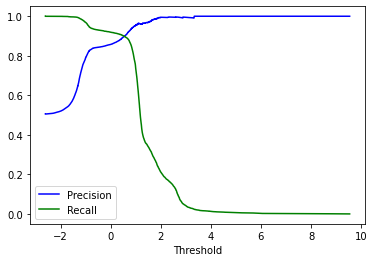

In [508]:
plot_precision_recall_vs_threshold(precisions_svm, recalls_svm, thresholds)
plt.show()

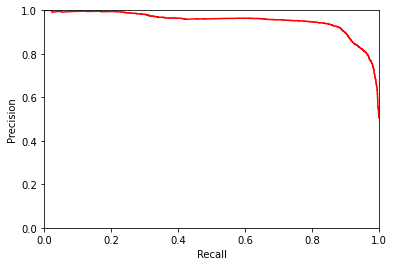

In [509]:
plot_precision_vs_recall(precisions_svm,recalls_svm)

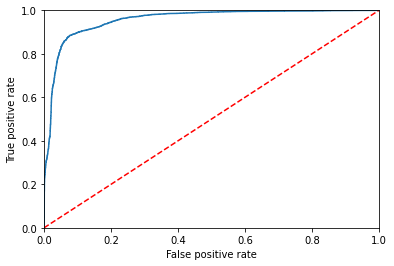

In [511]:
fpr_svm, tpr_svm, thresholds = roc_curve(web_out,svm_scores_)
plot_roc(fpr_svm,tpr_svm)

0.956110057496985

### Comparing the models

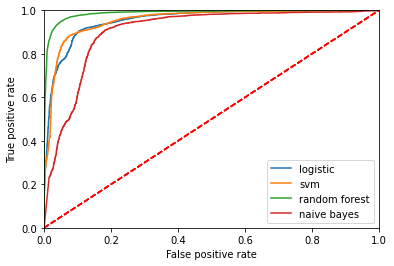

In [520]:
plot_roc(fpr_log,tpr_log,"logistic")
plot_roc(fpr_svm,tpr_svm,"svm")
plot_roc(fpr_rand,tpr_rand,"random forest")
#plot_roc(fpr_tree,tpr_tree,"decision tree")
plot_roc(fpr_naive,tpr_naive,"naive bayes")
plt.legend()

In [529]:
print("LOGISTIC : ",roc_auc_score(web_out,log_scores_),"NAIVE : ",roc_auc_score(web_out,naive_scores_proba[:,1]),"SVM : ",roc_auc_score(web_out,svm_scores_),"RANDOM FOREST : " ,roc_auc_score(web_out,rand_scores_proba[:,1]),roc_auc_score(web_out,tree_scores_proba[:,1]))

LOGISTIC :  0.9550709334554455 NAIVE :  0.9044700034439731 SVM :  0.956110057496985 RANDOM FOREST :  0.9875147961915658 0.9226396525352144
